# Techniques of High Performance Computing: First Assignment
### Jan Zmazek, Scientific Computing
This Python package imports a triangular grid from a legacy vtk file, or creates a square grid with $m\cdot n$ nodes, and solves a diffusion equation
$$\begin{cases}
-\nabla\cdot\sigma(r)\nabla u(r)=f(r) & \text{in } \Omega\\
u(r)=0 &\text{on }\partial\Omega.
\end{cases}$$
using a finite element method. It consists of three classes of methods: "grid" (to read a vtk file), "square_grid" (to create a square grid) and "fem" (finite element method) with additional module "triangle". Most of the code is covered by unit tests.

I have implemented "plot" function in plot.py so that it automatically plots the solution. The wanted "solve" funtion is in solve.py file.

In [1]:
from solve import solve
def f(x, y): return 1
def sigma(x, y): return 1
solve("example.vtk", sigma, f, integration_order=3)

## Examples
The first example is simple with only 4 internal nodes:

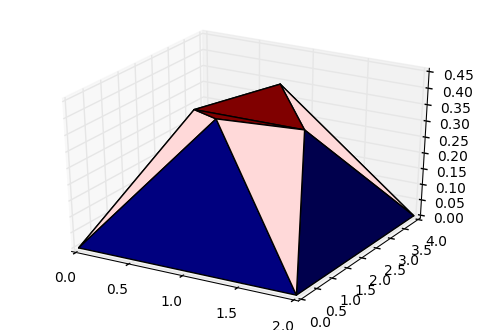

In [2]:
from plot import plot
plot("example.vtk", sigma, f)

Modifying functions $f$ and $\sigma$ gives very different result:

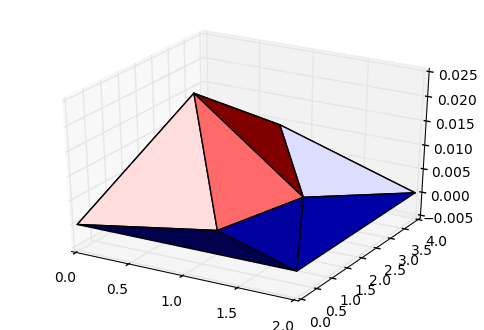

In [3]:
def f(x,y): return y-x
def sigma(x,y): return y+x
plot("example.vtk", sigma, f)

To easily generate examples, I additionally implemented a square_grid class which generates a square grid with number of points on x and y axis as arguments.

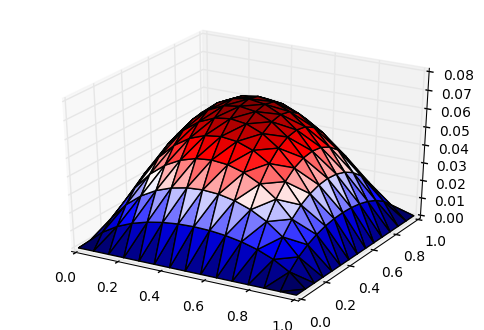

In [4]:
from plot import plot_square
def sigma(x, y): return 1
def f(x, y): return 1
plot_square(15, 15, sigma, f)

## Remarks
This package should work fine on any computer as it has very few external libraries (only numpy and scipy). If by any chance it doesn't work, there is a copy of this file on https://github.com/janzmazek/FEM/blob/master/solution.ipynb. Most of the code is covered by unittest, they can be run from the main folder by typing
```bash
python -m unittest
```
Pylint of the relevant files gives results:
- fem.py: 10/10
- triangle.py: 10/10
- grid.py: 10/10
- square.py: 10/10
- integration.py: 10/10

In [5]:
import numpy as np
from source.fem import Fem
vertices_matrix = np.array(
    [[0., 0.],
    [0.5, 0.],
    [1., 0.],
    [0., 0.5],
    [0.5, 0.5],
    [1., 0.5],
    [0., 1.],
    [0.5, 1.],
    [1., 1.]])

connectivity_matrix = np.array(
    [[0, 1, 4],
    [3, 4, 7],
    [1, 2, 5],
    [4, 5, 8],
    [0, 4, 3],
    [3, 7, 6],
    [1, 5, 4],
    [4, 8, 7]])
fem = Fem(vertices_matrix, connectivity_matrix)
fem.assembly([3, 4, 7], lambda x, y: 1, lambda x, y:1, 5)
fem.global_stiffness

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.5, -0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  1. ,  0. ,  0. , -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [6]:
fem.global_load

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.04166667],
       [ 0.04166667],
       [ 0.        ],
       [ 0.        ],
       [ 0.04166667],
       [ 0.        ]])